T-statistic: -10.907794819517582, P-value: 2.021976600517832e-08
Reject the null hypothesis: There is a significant difference in sleep durations between exam and non-exam days.


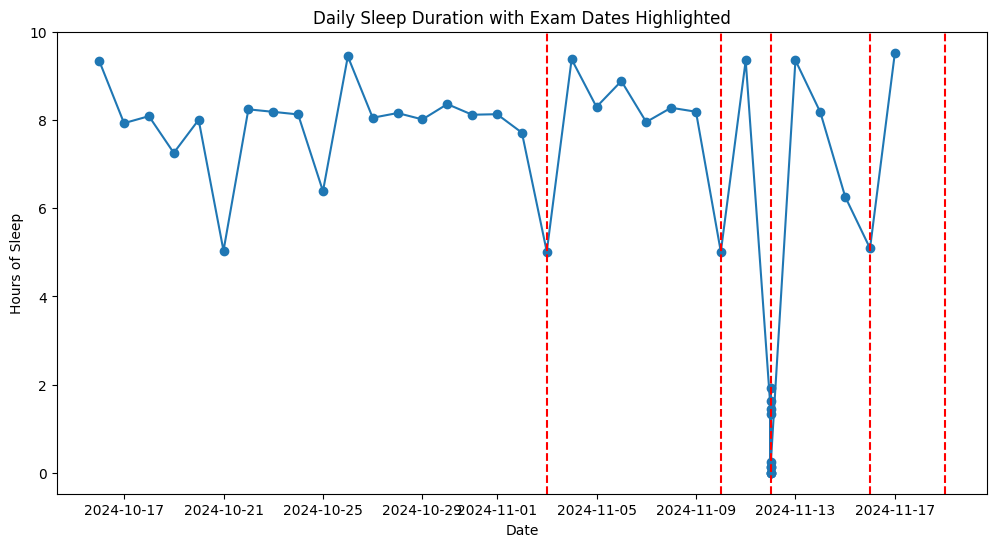

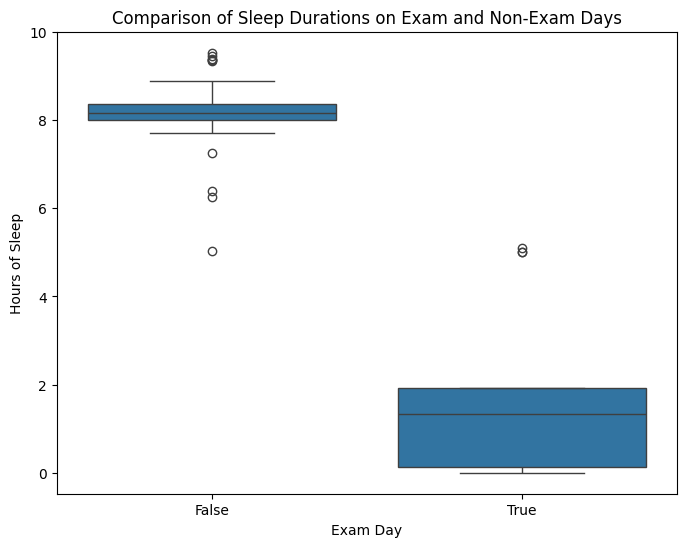

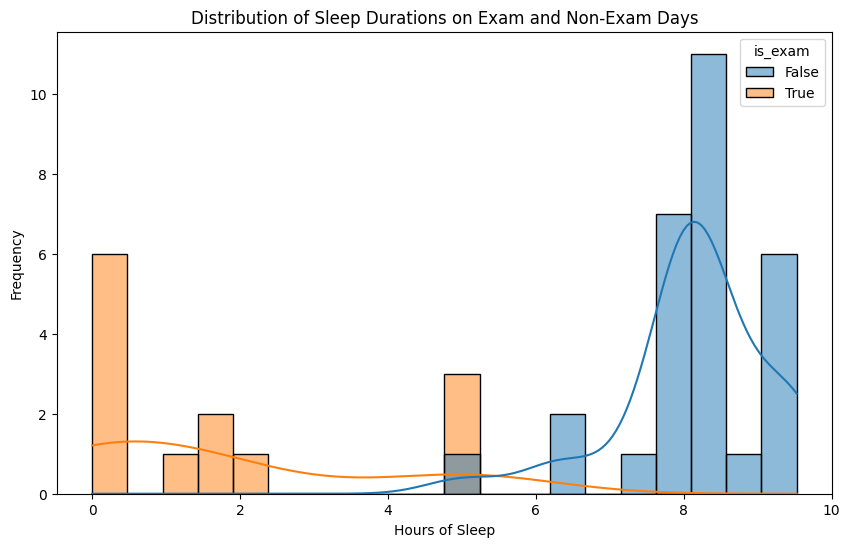

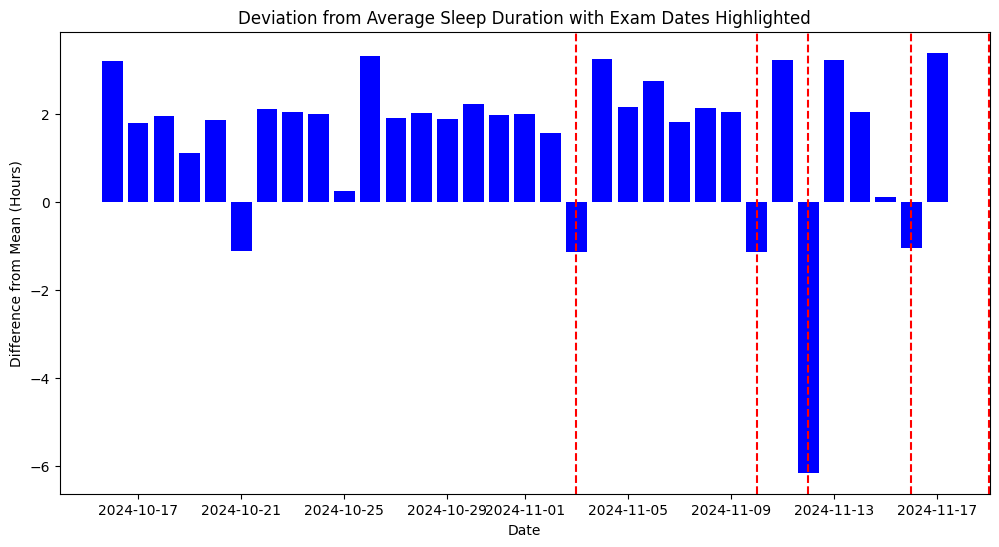

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

# Load the previously prepared sleep data
sleep_df = pd.read_csv('sleep_data_prepared.csv')

# Convert 'date' back to datetime for proper plotting
sleep_df['date'] = pd.to_datetime(sleep_df['date'])

# Filter the time period after October 15, 2024, until November 17, 2024
sleep_df = sleep_df[(sleep_df['date'] > pd.to_datetime('2024-10-15')) & (sleep_df['date'] <= pd.to_datetime('2024-11-17'))]

# List of exam dates
exam_dates = [
    pd.to_datetime('2024-11-03'), pd.to_datetime('2024-11-10'), pd.to_datetime('2024-11-12'),
    pd.to_datetime('2024-11-16'), pd.to_datetime('2024-11-19')
]

# Add a column indicating whether the day is an exam date
sleep_df['is_exam'] = sleep_df['date'].isin(exam_dates)

# Perform t-test to test the hypothesis
exam_days = sleep_df[sleep_df['is_exam'] == True]['duration_hours']
non_exam_days = sleep_df[sleep_df['is_exam'] == False]['duration_hours']

# Null Hypothesis: No significant change in sleep durations between exam and non-exam days
# Alternative Hypothesis: Significant difference in sleep durations between exam and non-exam days

t_stat, p_value = stats.ttest_ind(exam_days, non_exam_days, equal_var=False)
alpha = 0.05

print(f'T-statistic: {t_stat}, P-value: {p_value}')
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in sleep durations between exam and non-exam days.")
else:
    print("Fail to reject the null hypothesis: No significant difference in sleep durations between exam and non-exam days.")

# Visualization: Line chart highlighting exam dates as vertical lines
plt.figure(figsize=(12, 6))
plt.plot(sleep_df['date'], sleep_df['duration_hours'], marker='o', linestyle='-')
for exam_date in exam_dates:
    plt.axvline(x=exam_date, color='red', linestyle='--')
plt.title('Daily Sleep Duration with Exam Dates Highlighted')
plt.xlabel('Date')
plt.ylabel('Hours of Sleep')
plt.show()

# Visualization 2: Boxplot comparing sleep duration on exam vs non-exam days
plt.figure(figsize=(8, 6))
sns.boxplot(x='is_exam', y='duration_hours', data=sleep_df)
plt.title('Comparison of Sleep Durations on Exam and Non-Exam Days')
plt.xlabel('Exam Day')
plt.ylabel('Hours of Sleep')
plt.show()

# Visualization 3: Histogram of sleep durations
plt.figure(figsize=(10, 6))
sns.histplot(data=sleep_df, x='duration_hours', hue='is_exam', kde=True, bins=20)
plt.title('Distribution of Sleep Durations on Exam and Non-Exam Days')
plt.xlabel('Hours of Sleep')
plt.ylabel('Frequency')
plt.show()


# Visualization 6: Sleep duration difference from mean
mean_sleep = sleep_df['duration_hours'].mean()
sleep_df['difference_from_mean'] = sleep_df['duration_hours'] - mean_sleep
plt.figure(figsize=(12, 6))
plt.bar(sleep_df['date'], sleep_df['difference_from_mean'], color='blue')
for exam_date in exam_dates:
    plt.axvline(x=exam_date, color='red', linestyle='--')
plt.title('Deviation from Average Sleep Duration with Exam Dates Highlighted')
plt.xlabel('Date')
plt.ylabel('Difference from Mean (Hours)')
plt.show()



In [4]:
from scipy.stats import shapiro

stat, p_value = shapiro(sleep_df['duration_hours'])
print(f'Statistic={stat}, P-value={p_value}')
if p_value > 0.05:
    print("Data is normally distributed (Fail to reject null hypothesis)")
else:
    print("Data is NOT normally distributed (Reject null hypothesis)")


Statistic=0.7851807423856763, P-value=2.172089355103162e-06
Data is NOT normally distributed (Reject null hypothesis)


**Checking whether my data is normally distributed or not, in order to utilize Mann-Whitney U Test**

In [5]:
from scipy.stats import mannwhitneyu

# Null Hypothesis: No significant change in sleep durations between exam and non-exam days
# Alternative Hypothesis: Significant difference in sleep durations between exam and non-exam days

u_stat, p_value = mannwhitneyu(exam_days, non_exam_days, alternative='two-sided')
alpha = 0.05

print(f'U-statistic: {u_stat}, P-value: {p_value}')
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in sleep durations between exam and non-exam days.")
else:
    print("Fail to reject the null hypothesis: No significant difference in sleep durations between exam and non-exam days.")


U-statistic: 1.0, P-value: 3.6230158702181363e-07
Reject the null hypothesis: There is a significant difference in sleep durations between exam and non-exam days.
